# Import the required libraries

In [267]:
import csv
import sys
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
import random
from collections import Counter
import pickle
from mlxtend.preprocessing import one_hot
from matplotlib import pyplot
import pandas as pd
import re

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

lemmatizer = WordNetLemmatizer()

# Helper Functions

In [171]:
def string_clean(line):
    '''
    Input : String
    Removes any extra characters in the string
    Output : String
    '''

    temp = re.sub(r"[^A-Za-z]", " ", line)
    temp = temp.strip().lower()
    return temp

def sanitize(token):
    stop_words = set(nltk.corpus.stopwords.words('english')) 
    stop_words.add('amp')
    return_token = [word for word in token if not word in stop_words and len(word) > 1]
    return return_token

def tokenize(line):
    '''
    Input: String
    Output : Tokenized string in vector form
    '''
    
    token = word_tokenize(line) 
    token = sanitize(token)
    return token
  
def lemmatize(token_sentence):
    return [lemmatizer.lemmatize(token) for token in token_sentence]


# Functions to create lexicon

In [172]:
def create_lexicon(dataset, max_count, min_count):
    '''
    Inputs
    ------------
    dataset: must be a list of sentences
    max_count : Maximum times a word can appear in total to be in the lexicon
    min_count : Minimum times a word can appear in total to be in the lexicon

    Outputs
    -----------
    lexicon: (1xN) list of integers corresponding to most frequest words under bound
    '''
  
    lexicon = []
    length = len(dataset)
    for review in dataset:
        review = string_clean(review)
        token_sentence = tokenize(review)
        base = lemmatize(token_sentence)
        lexicon.extend(base)
    count = Counter(lexicon)
    lexicon = []
    for word in count:
        if max_count > count[word] > min_count:
            lexicon.append(word)
    return lexicon

def bag_of_words(lexicon, data):
    '''
    Inputs
    ----------
    lexicon = the lexion based on which we model the data
    data = list of reviews/sentences

    Outputs
    ----------
    output = bag of words model of the input data
    '''
    featureset = []
    for sentence in data:
        sentence = string_clean(sentence)
        token_sentence = tokenize(sentence)
        base = lemmatize(token_sentence)
        feature = np.zeros(len(lexicon))
        for each_word in base:
            if each_word in lexicon:
                index = lexicon.index(each_word)
                feature[index] += 1
        featureset.append(feature)
    return featureset
  

# Read Dataset and split the data

In [203]:
dataset = pd.read_csv('filtered_tweets.csv')

# dropping ALL duplicate values 
dataset.sort_values("text", inplace = True)  
dataset.drop_duplicates(subset ="text", keep = False, inplace = True) 

X_train, X_test, y_train, y_test = train_test_split(dataset, dataset.iloc[:,12], test_size=0.20, random_state=42)

# Create the Lexicon and Featureset

In [206]:
print("Creating Lexicon....")
lexicon = create_lexicon(dataset['text'], 700,20)
print("Lexicon Generated....")
print("Size of Lexicon : ", len(lexicon))

print("Creating featureset....")
train_features = bag_of_words(lexicon, X_train['text'])
test_features = bag_of_words(lexicon, X_test['text'])
print("featuresets created")

Creating Lexicon....
Lexicon Generated....
Size of Lexicon :  459
Creating featureset....
featuresets created


# Model 1 : Random Forest Classifier

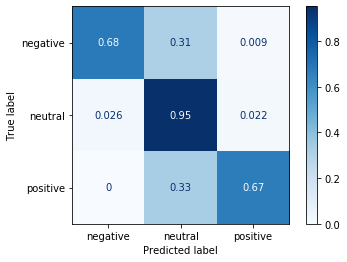

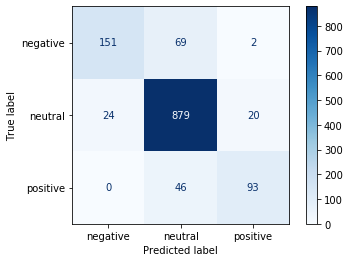

In [254]:
model1 = RandomForestClassifier(max_depth=None, random_state=0)
model1.fit(train_features, y_train)

y_true = y_test.tolist()
y_pred = model1.predict(test_features).tolist()

disp = plot_confusion_matrix(model1, test_features, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                values_format = '.2g')

disp = plot_confusion_matrix(model1, test_features, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                values_format = '.5g')

# Model 2 : Linear SVM

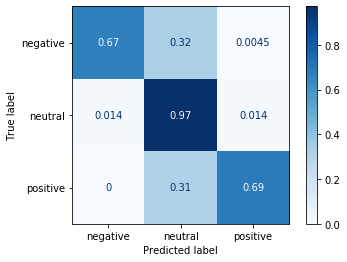

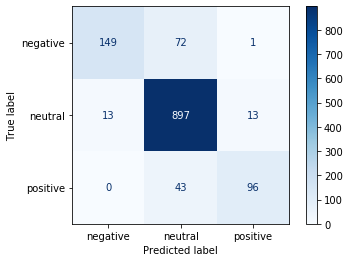

In [258]:
model2 = LinearSVC(random_state=0, tol=1e-5, max_iter = 10000)
model2.fit(train_features, y_train)

y_true = y_test.tolist()
y_pred = model2.predict(test_features).tolist()

disp = plot_confusion_matrix(model2, test_features, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                values_format = '.2g')

disp = plot_confusion_matrix(model2, test_features, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                values_format = '.5g')

# Model 3 : AdaBoost Classifier

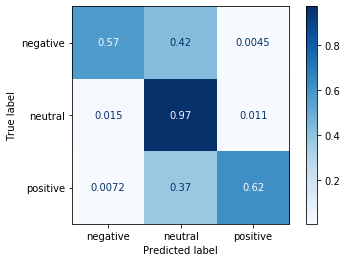

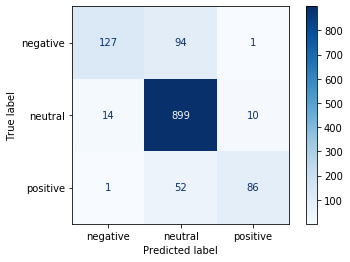

In [263]:
model3 = AdaBoostClassifier(n_estimators=100, random_state=0)
model3.fit(train_features, y_train)

y_true = y_test.tolist()
y_pred = model3.predict(test_features).tolist()

disp = plot_confusion_matrix(model3, test_features, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                values_format = '.2g')

disp = plot_confusion_matrix(model3, test_features, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                values_format = '.5g')

# Model 4 : Multi Layer Perceptron

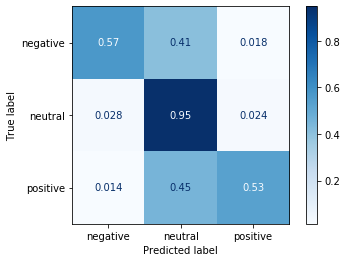

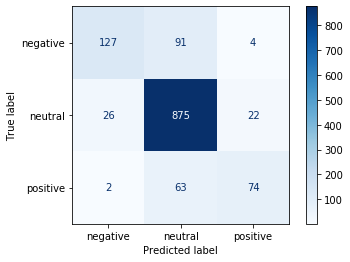

In [277]:
model4 = MLPClassifier(hidden_layer_sizes = [64,256,64], activation = 'relu', learning_rate = 'adaptive')
model4.fit(train_features, y_train)

y_true = y_test.tolist()
y_pred = model4.predict(test_features).tolist()

disp = plot_confusion_matrix(model4, test_features, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                values_format = '.2g')

disp = plot_confusion_matrix(model4, test_features, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                values_format = '.5g')